# 1. Create a CNN model for binary class problems.

In [1]:
import tensorflow
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import array_to_img,img_to_array,load_img
import matplotlib as mt
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Activation
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

In [5]:
# Create an image instance of the ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=0.2,
    zoom_range=0.2,
    rescale=1./255,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)
print('training length:\n')
batch_size = 16
train_data = train_datagen.flow_from_directory(
    'C:/Users/admin/DL_python(AI Solution Developer)/elephants_train',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)
print()
print('training length:\n')
test_data = test_datagen.flow_from_directory(
    'C:/Users/admin/DL_python(AI Solution Developer)/elephants_test',  
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

training length:

Found 840 images belonging to 2 classes.

training length:

Found 188 images belonging to 2 classes.


In [6]:
model = Sequential()

# 1st convolution layer
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

# 2nd convolution layer
model.add(Conv2D(64, (3, 3),input_shape=(150,150,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

# 3rd convolution layer
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

# Converting multi-dimensional to 1D array
model.add(Flatten())
model.add(Dense(units=150, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 32)       

In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
result=model.fit(train_data,
                 steps_per_epoch=48//batch_size,epochs=30,
                 validation_data=test_data,
                 validation_steps=48//batch_size
                )

Epoch 1/30


3/3 [==============================] - 12s 4s/step - loss: 0.7133 - accuracy: 0.6000 - val_loss: 0.7926 - val_accuracy: 0.4583
Epoch 2/30
3/3 [==============================] - 7s 3s/step - loss: 0.7410 - accuracy: 0.5000 - val_loss: 0.6789 - val_accuracy: 0.7292
Epoch 3/30
3/3 [==============================] - 5s 2s/step - loss: 0.6944 - accuracy: 0.5417 - val_loss: 0.6831 - val_accuracy: 0.7083
Epoch 4/30
3/3 [==============================] - 6s 3s/step - loss: 0.6895 - accuracy: 0.5000 - val_loss: 0.6846 - val_accuracy: 0.6458
Epoch 5/30
3/3 [==============================] - 4s 2s/step - loss: 0.6889 - accuracy: 0.5625 - val_loss: 0.6893 - val_accuracy: 0.4167
Epoch 6/30
3/3 [==============================] - 4s 2s/step - loss: 0.7148 - accuracy: 0.4583 - val_loss: 0.6791 - val_accuracy: 0.6042
Epoch 7/30
3/3 [==============================] - 5s 2s/step - loss: 0.6771 - accuracy: 0.6250 - val_loss: 0.6889 - val_accuracy: 0.5417
Epoch 8/30
3/3 [======================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


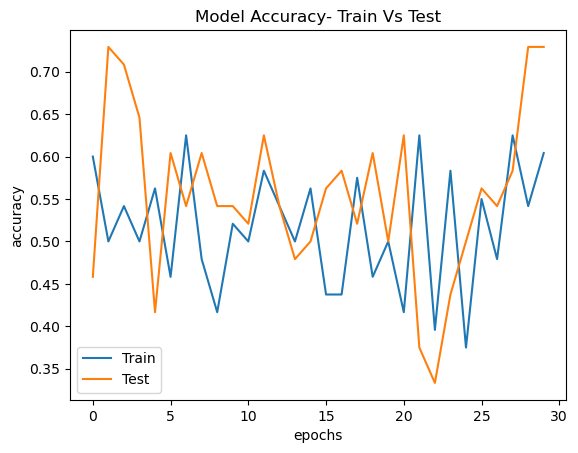

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

print(result.history.keys())
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('Model Accuracy- Train Vs Test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train','Test'])
plt.show()


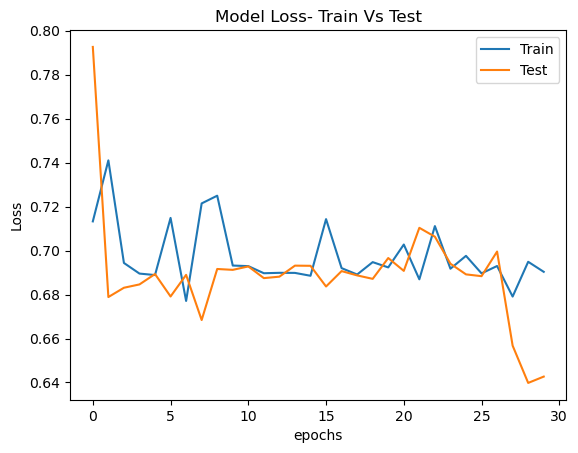

In [14]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model Loss- Train Vs Test')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['Train','Test'])
plt.show()

# 2. Build a multiclass classification model using CNN

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPool2D
from keras import backend as k

In [16]:
batch_size=128
num_classes=10

In [17]:
img_rows,img_cols=28,28

In [18]:
from keras.datasets import mnist
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

In [19]:
print('Training set images shape: {}'.format(xtrain.shape))
print('Testing set images shape: {}'.format(xtest.shape))

print('Training set labels shape: {}'.format(ytrain.shape))
print('Testing set labels shape: {}'.format(ytest.shape))

Training set images shape: (60000, 28, 28)
Testing set images shape: (10000, 28, 28)
Training set labels shape: (60000,)
Testing set labels shape: (10000,)


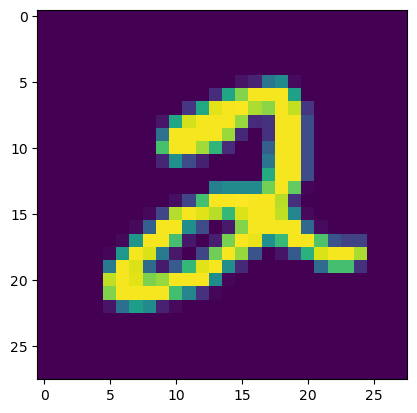

In [20]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[5])

In [21]:
xtrain[0].shape

(28, 28)

In [22]:
#reshape data to fit model
xtrain=xtrain.reshape(xtrain.shape[0],img_rows,img_cols)
xtest=xtest.reshape(xtest.shape[0],img_rows,img_cols)

print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28)
(10000, 28, 28)


In [23]:
xtrain=xtrain.astype('float32')
xtest=xtest.astype('float32')

In [24]:
xtrain/=255
xtest/=255

In [25]:
print('xtrain shape:',xtrain.shape)
print(xtrain.shape[0],'train samples')
print(xtest.shape[0],'test samples')

xtrain shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [26]:
ytrain=keras.utils.to_categorical(ytrain)
ytest=keras.utils.to_categorical(ytest)

In [27]:
model = Sequential()

# Add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Dropout(0.2))

model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 dropout_1 (Dropout)         (None, 26, 26, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                46090     
                                                      

In [29]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
result=model.fit(xtrain,ytrain,batch_size=batch_size,
                epochs=3,verbose=1,
                validation_data=(xtest,ytest))

Epoch 1/3
469/469 [==============================] - 119s 250ms/step - loss: 0.2521 - accuracy: 0.9249 - val_loss: 0.0666 - val_accuracy: 0.9795
Epoch 2/3
469/469 [==============================] - 109s 233ms/step - loss: 0.0696 - accuracy: 0.9787 - val_loss: 0.0573 - val_accuracy: 0.9826
Epoch 3/3
469/469 [==============================] - 111s 237ms/step - loss: 0.0487 - accuracy: 0.9849 - val_loss: 0.0486 - val_accuracy: 0.9844


In [34]:
score=model.evaluate(xtest,ytest,verbose=0)
print('Test Loss:',score[0])
print()
print('Test accuracy',score[1])

Test Loss: 0.04863230139017105

Test accuracy 0.9843999743461609


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


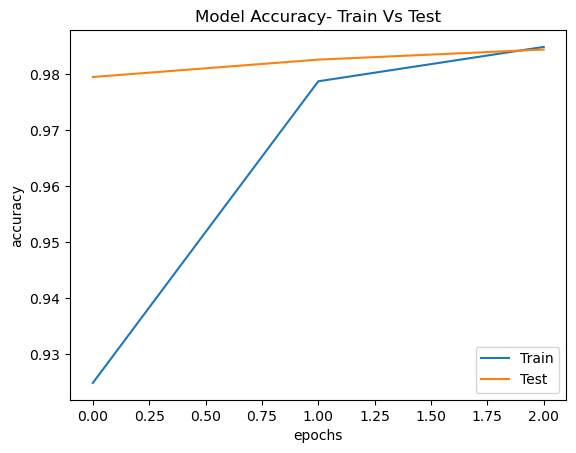

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

print(result.history.keys())
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('Model Accuracy- Train Vs Test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train','Test'])
plt.show()

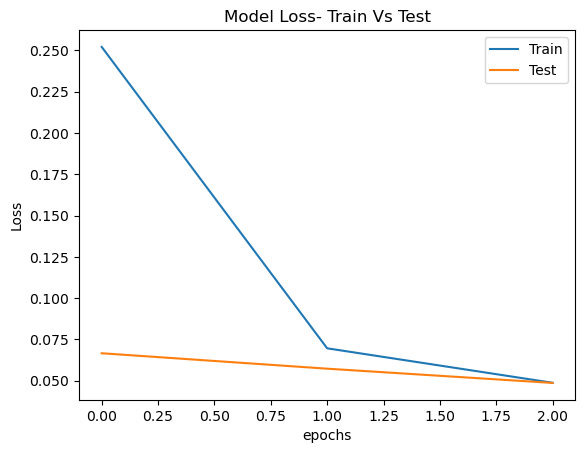

In [33]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model Loss- Train Vs Test')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['Train','Test'])
plt.show()